In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
mean = df['age'].mean()
df['age'].fillna(value=mean, inplace=True)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

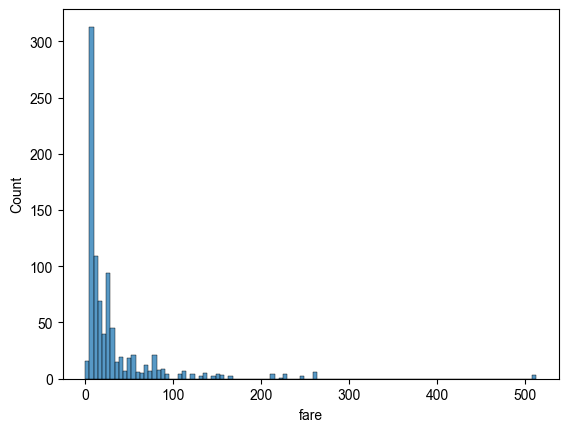

In [7]:
sns.histplot(x='fare', data=df)
sns.set(rc={'figure.figsize':(5,5)})

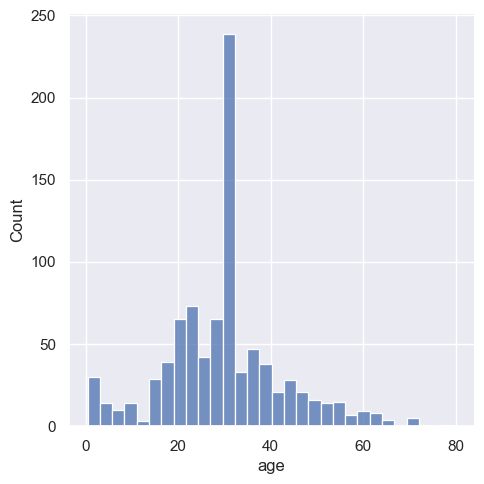

In [10]:
sns.displot(x='age', data=df)
sns.set(rc={'figure.figsize':(5,5)})

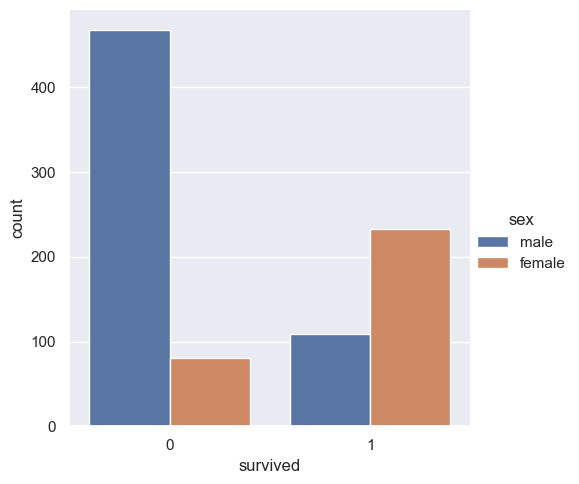

In [12]:
sns.catplot(x='survived', data=df, kind='count', hue='sex')
sns.set(rc={'figure.figsize':(5,5)})

<Axes: xlabel='sex', ylabel='age'>

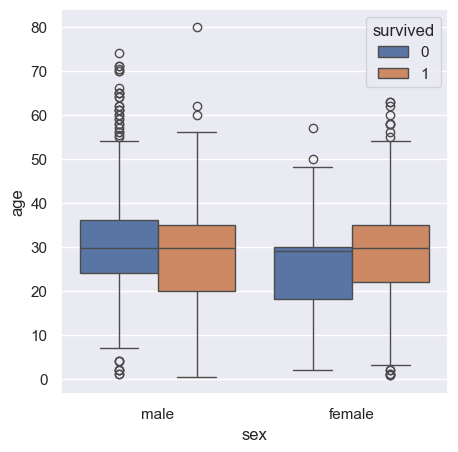

In [13]:
sns.boxplot(x='sex', y='age', data=df, hue='survived')

In [14]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
Q1, Q3

(22.0, 35.0)

In [18]:
IQR = Q3- Q1
IQR

13.0

In [19]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(2.5, 54.5)

In [20]:
df[(df.age<lower_limit)|(df.age>upper_limit)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
829,1,1,female,62.00,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
